# Phase 2 - Machine Learning with Sklearn and LightGBM

### This notebook will complement the previous notebook (ML_models_with_Python_1x6_xgb)

##### Build - 6 new ML models using the framework sklearn and LightGBM
- Logistic regression
- Naive Bayes
- Random Forest
- GBM
- Extra Tree Classifier
- LightGBM

#### Info about model evaluation - accuracy metric vs recall
- The global metric accuracy will be used to evaluate the models between all frameworks (xgb, lgbm, sklearn, h2o.ai and Apache Spark)

#### The last notebook build ml models using python will provide some additional techniques, such as:
- Unbalanced classification and class weight
- Smote technique for oversampling the training dataset
- Standard Scale vs. default data and 
- Finally, exchange the global metric accuracy and use recall metric < recall or Sensitivity or True positive rate (TPR) > 
<br> Recall metric is a better metric than accuracy to evaluate this type of scenario (customer churn)


### Sites for additional information

- sklearn: https://scikit-learn.org
- sklearn Ensemble methods: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Remove warnings
import warnings
warnings.filterwarnings("ignore")

## Sklearn Metrics - Classification and model selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

## Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

## export model
import pickle

### Load dataset

In [3]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## Filter columns and set values
df.loc[(df.tenure==0) & (df.TotalCharges == ' '), ['TotalCharges', 'tenure']] = 0
df['TotalCharges'] = df['TotalCharges'].astype('float')

target = 'Churn'
current_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'PaymentMethod' , 'Churn', 'Contract']

df = df[current_features]

In [5]:
## BACKUP FOR EXECUTION
df_BACKUP = df.copy()
df = df_BACKUP

In [6]:
## Target 
target = 'Churn'
features = df.columns.to_list()
# features.remove(target)

current_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'PaymentMethod' , 'Churn', 'Contract']
current_features

df = df[features]

## One Hot Encode for categorical features
OHE_cols = ['gender', 'PaymentMethod' , 'Contract']
df = pd.get_dummies(data=df, columns=OHE_cols)
df.head(3)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,29.85,29.85,No,1,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,No,0,1,0,0,0,1,0,1,0
2,2,53.85,108.15,Yes,0,1,0,0,0,1,1,0,0


## Data preparation to run the ML models

In [7]:
target = 'Churn'
features = df.columns.to_list()
features.remove(target)

target_label_encode = lambda x: ['No', 'Yes'].index(x)
df[target] = df[target].apply(target_label_encode)
X = df[features].values
y = df[target].values

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)

In [8]:
df['Churn'].unique()

array([0, 1], dtype=int64)

### ML - Logistic Regression 
- Accuracy : 78,96%

In [9]:
## Logistic Regression
model_LG = LogisticRegression(random_state=SEED)
model_LG.fit(X_train, y_train)

predict_LG = model_LG.predict(X_test)

## ML score
print('')
print('REPORT : Logistic Regression')
print('')
# print_confusion_matrix(y_test, predict_LG)
print('Accuracy score: ', accuracy_score(y_test, predict_LG))



REPORT : Logistic Regression

Accuracy score:  0.7896774193548387


### ML - Naive Bayes
- Accuracy 68.90%

In [10]:
## Naive Bayes

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

predict_NB = model_NB.predict(X_test)

## ML score
print('')
print('REPORT : Naive Bayes')
print('')
# print_confusion_matrix(y_test, predict_NB)
print('Accuracy score: ', accuracy_score(y_test, predict_NB))



REPORT : Naive Bayes

Accuracy score:  0.6890322580645162


### ML - Random Forest
- Accuracy : 77,80%

In [11]:
model_RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=SEED)

model_RF.fit(X_train, y_train)

## Score - Out of Bags - training
model_RF.score(X_train, y_train)

predict_RF = model_RF.predict(X_test)

## ML score
print('')
print('REPORT : Random Forest')
print('')
# print_confusion_matrix(y_test, predict_RF)
print('Accuracy score: ', accuracy_score(y_test, predict_RF))



REPORT : Random Forest

Accuracy score:  0.7780645161290323


### ML - Extra Tree Classifier
- Accuracy : 75,91%

In [12]:
model_ExT = ExtraTreesClassifier(random_state=SEED)
model_ExT.fit(X_train, y_train)

predict_ExT = model_ExT.predict(X_test)


## ML score
print('')
print('REPORT : Extra Tree Classifier')
print('')
# print_confusion_matrix(y_test, predict_ExT)
print('Accuracy score: ', accuracy_score(y_test, predict_ExT))



REPORT : Extra Tree Classifier

Accuracy score:  0.7591397849462366


### ML - LightGBM
- Accuracy: 79,82%

In [13]:
## LGBM
print('')
print('Starting training...')

# train
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)

# predict
y_pred = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration_)

## ML score
print('')
print('REPORT : LightGBM')
print('')
# eval
print('The Accuracy of prediction is:', accuracy_score(y_test, y_pred) )


Starting training...

REPORT : LightGBM

The Accuracy of prediction is: 0.7982795698924732


### ML - GBM
- Accuracy : 80,0%

In [14]:
## GBM
model_GBM = GradientBoostingClassifier(random_state=SEED)
model_GBM.fit(X_train, y_train)

## Predict
y_predict_GBM = model_GBM.predict(X_test)

## ML score
print('')
print('REPORT : GBM')
print('')
# print_confusion_matrix(y_test, predict_GBM)
print('Accuracy score: ', accuracy_score(y_test, y_predict_GBM))


REPORT : GBM

Accuracy score:  0.8


## Evaluation report 

### Confusion matrix - associated with GBM model 

- The GBM model was the first model that achieve 80,0% of accuracy
- Until now, GBM have the best accuracy performance

Additional info - Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html

In [15]:
## Function to print Confusion Matrix and metrics
def print_confusion_matrix(y_true, y_pred):
    """Print metrics"""
    report = classification_report(y_true, y_pred)
    confusion_matrix_rpt = confusion_matrix(y_true, y_pred)
    accuracy_score_rpt = accuracy_score(y_true, y_pred)
    
    print('--   Confusion Matrix')
    print(confusion_matrix_rpt)
    print('')
    print('--   Accuracy')
    print(accuracy_score_rpt)
    print('')
    print('--   Metrics report')
    print(report)

print_confusion_matrix(y_test, y_predict_GBM)    

--   Confusion Matrix
[[1538  159]
 [ 306  322]]

--   Accuracy
0.8

--   Metrics report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1697
           1       0.67      0.51      0.58       628

    accuracy                           0.80      2325
   macro avg       0.75      0.71      0.72      2325
weighted avg       0.79      0.80      0.79      2325



## Example how to execute all 6 machine learning models using cross-validation at once
- GBM is again the model with better accuracy - decrease of 1,4% (from 80,0% to 78,6%) but still the better one
- Print and plot the accuracy score at the end

In [16]:
## Run all model using Cross validation, check metrics and compare again vs train test split methodology
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ExT', ExtraTreesClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('LGBM', lgb.LGBMClassifier()))

score_models = []
rpt_models = []

for model_name, model in models:
    kfold = KFold(n_splits = 7, random_state = SEED)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    score_models.append(cv_results)
    rpt_models.append(model_name)
    msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
    print(msg)    


LR: 0.788046 (0.008409)
NB: 0.681433 (0.015555)
RF: 0.768546 (0.006914)
ExT: 0.758584 (0.011594)
GBM: 0.786774 (0.012879)
LGBM: 0.772785 (0.016203)


### Plot results: Cross-Validation

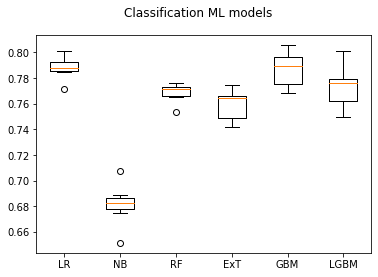

In [17]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Classification ML models')
ax = fig.add_subplot(111)
plt.boxplot(score_models)
ax.set_xticklabels(rpt_models)
plt.show()

### Export baseline model GBM
- GBM model achieved the highest accuracy between all models.
- Accuracy: 80% 

In [18]:
# Salvando o modelo
file_export_model = './ML_models/model_GBM_baseline_v1.sav'
pickle.dump(model_GBM, open(file_export_model, 'wb'))
print("Model exported")

Model exported


### Test import and run the prediction again

In [19]:
GBM_model = pickle.load(open(file_export_model, 'rb'))
print_confusion_matrix(y_test, GBM_model.predict(X_test))

--   Confusion Matrix
[[1538  159]
 [ 306  322]]

--   Accuracy
0.8

--   Metrics report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1697
           1       0.67      0.51      0.58       628

    accuracy                           0.80      2325
   macro avg       0.75      0.71      0.72      2325
weighted avg       0.79      0.80      0.79      2325



### Plot Feature importance - GBM

#### The 3 most important features, characteristics that influence customer churn are:
- Contract_Month-to_Month
- MonthlyCharges and
- tenure

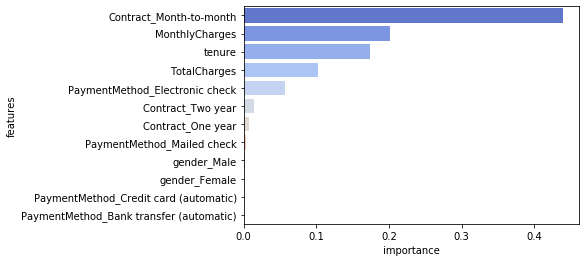

In [20]:
# Plot feature importance
feature_importances = pd.DataFrame({'features': features, 
                            'importance': model_GBM.feature_importances_}).sort_values('importance', ascending=False)

ax = sns.barplot(x="importance", y="features", data=feature_importances, palette="coolwarm")

# Summary

### The top 3 most important features related to Churn (Yes) are:
- Month-to-Month contract
- Monthly Charges
- and tenure

### Let´s move on with ML model built using H2O.ai framework

In [23]:
# !jupyter nbconvert --to html Phase_2_Build_ML_models_with_Python_2x6_sklearn_and_lightgbm.ipynb